In [279]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser

from __future__ import division

# Purpose

This notebook is meant to be one place to put all of findings about the VA.

## How To Read

If you don't know code, ignore everything in a box. 

# Reading in Data

In [280]:
# National
national_complete = pd.read_csv("Data/Wait_Time/Completed_Cleaned/National_Complete.csv")
national_pending = pd.read_csv("Data/Wait_Time/Pending_Clean/National_Pending.csv")


#used to strip time from Pending_Time
def get_date(test):
    test = test.strip('National: ')
    return parser.parse(test)

national_complete["date"] = national_complete["Complete_Time"].apply(get_date)
national_pending["date"] = national_pending["Pending_Time"].apply(get_date)
national_pending = national_pending.drop(20) #for some reason this was read in as 1989. Just dropping it

Onboard = pd.read_csv("Data/Staff_Size/Onboard_By_station_By_FY.csv").head(1).drop("ORGANIZATION",1).drop("ID",1)

choice_hires = pd.read_csv("Data/Hiring/Hiring_Clean_All_Positions.csv")

df = pd.read_csv("Data/Master/Master.csv")
df["Station"] = df["Station"].apply(str)

Station_List = ["642","512","565","508","509","544","516","546","573","675","614","621","626",
               "657","520","586","598","501","644","756","442","554","531","648","653","663","668",
               "459","612","593","600","605","691"]
mark = []
for index, row in df.iterrows():
    if row["Station"] in Station_List:
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark

# Functions

In [281]:
def multiples(metric, label):
    #print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(8,9))
    ax1.set_title("Percent Increase for PC Pending")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax2.set_title("Percent Increase for PC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax3.set_title("Percent Increase for SC Pending")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax4.set_title("Percent Increase for SC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax5.set_title("Percent Increase for MH Pending")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax6.set_title("Percent Increase for MH Complete")
    
    df.plot(kind ='scatter',y=metric, x ="Percentage_Point_Wait_Over_30_Increase_Pending", ax=ax7,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax7.set_title("Percent Point Increase for Wait Over 30 Pending")
    
    df.plot(kind ='scatter',y=metric, x ="Percentage_Point_Wait_Over_30_Increase_Complete", ax=ax8,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax8.set_title("Percent Point Increase for Wait Over 30 Complete")
    plt.tight_layout()
    
def multiples_2014(metric):
    #print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(8,9))
    ax1.set_title("PC Pending in 2014")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_1412", ax=ax1,c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none', edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_1409", ax=ax2,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax2.set_title("PC Complete in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_1412", ax=ax3,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax3.set_title("SC Pending in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_1409", ax=ax4,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax4.set_title("SC Complete in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_1412", ax=ax5,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax5.set_title("MH Pending in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_1409", ax=ax6,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax6.set_title("MH Complete in 2014")
    
    df.plot(kind ='scatter',y=metric, x ='%_Appts_Over_30_Pending_1412', ax=ax7,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax7.set_title("Wait Over 30 Pending in 2014")
    
    df.plot(kind ='scatter',y=metric, x ='%_Appts_Over_30_Complete_1409', ax=ax8,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax8.set_title("Wait Over 30 Complete in 2014")
    plt.tight_layout()

# Our Main Questions:

### How much did staffing go up after 2014?

### How much was spent to raise the staffing level?

### Did wait times improve? 

### Were choice hires sent to the places with the worst wait times?

### Did choice hires help where they were sent?

### Is there any correlation with choice hires and veterans populations?

### Did the prioritized stations correlate with veterans population?

### Did the prioritized stations get more hires?

# How Much Did Staffing go up after 2014?

In [282]:
print "Here are the onboard employees by year."
Onboard

Here are the onboard employees by year.


,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16
0,268699,272538.0,283338,294444,307430,318560


In [283]:
increase_2014_2016 = Onboard["MAY-FY16"].item()-Onboard["MAY-FY14"].item()
increase_2014_2016_percent = round((increase_2014_2016/Onboard["MAY-FY14"].item())*100,2)
increase_2012_2014 = Onboard["MAY-FY14"].item()-Onboard["MAY-FY12"].item()
increase_2012_2014_percent = round((increase_2012_2014/Onboard["MAY-FY12"].item())*100,2)


print"Staffing went from {} in May 2014 to {} in May 2016. That's an increase of {} staffers across the VHA, or a {} percent increase.".format(
    Onboard["MAY-FY14"].item(),Onboard["MAY-FY16"].item(),increase_2014_2016, increase_2014_2016_percent)

print "2012 to 2014 saw an increase of {}, or {} percent.".format(
    increase_2012_2014, increase_2012_2014_percent)
print "That's an additional {} staff increase in 14-to-16 compared to 12-to-14, or a {} percentage point difference in the percent increase.".format(
    increase_2014_2016 - increase_2012_2014, increase_2014_2016_percent - increase_2012_2014_percent)

Staffing went from 294444 in May 2014 to 318560 in May 2016. That's an increase of 24116 staffers across the VHA, or a 8.19 percent increase.
2012 to 2014 saw an increase of 21906.0, or 8.04 percent.
That's an additional 2210.0 staff increase in 14-to-16 compared to 12-to-14, or a 0.15 percentage point difference in the percent increase.


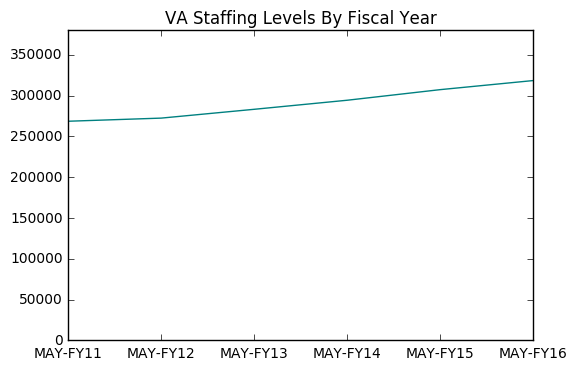

In [284]:
ax = Onboard.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()

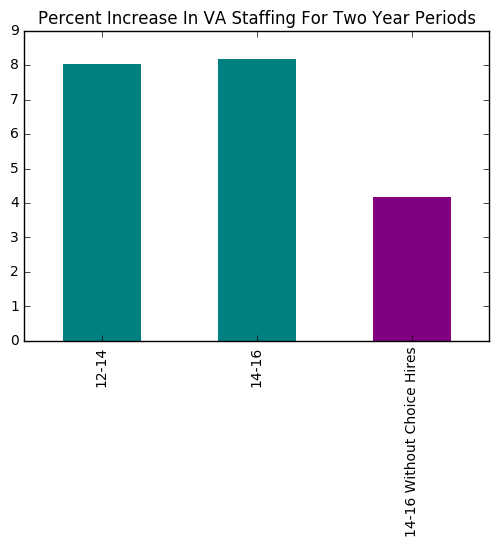

In [285]:
choice_hires_total = choice_hires["NbrEmps"].sum()
MAY_FY16_no_choice_hires = Onboard["MAY-FY16"].item() -Onboard["MAY-FY14"].item() - choice_hires_total.item()


percent_increase_dict = {}
#percent_increase_dict["11-13"] = ((Onboard["MAY-FY13"] -Onboard["MAY-FY11"])/Onboard["MAY-FY11"])*100
percent_increase_dict["12-14"] = ((Onboard["MAY-FY14"] -Onboard["MAY-FY12"])/Onboard["MAY-FY12"])*100
#percent_increase_dict["13-15"] = ((Onboard["MAY-FY15"] -Onboard["MAY-FY13"])/Onboard["MAY-FY13"])*100
percent_increase_dict["14-16"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"])/Onboard["MAY-FY14"])*100
percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase_dict["14-16 Without Choice Hires"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"]-MAY_FY16_no_choice_hires)/Onboard["MAY-FY14"])*100
percent_increase = pd.DataFrame.from_dict(percent_increase_dict)

ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

# How much was spent to raise the staffing level?

In [286]:

#percent_increase_dict["14-16 No Choice Hires"] = ((MAY_FY16_no_choice_hires - Onboard["MAY-FY14"].item())/Onboard["MAY-FY14"].item())
print "There were {} choice act hires still employed at the VA as of 9/15/16. If we subtract this from the May-FY16 staffing increase, we"\
" see about {} onboard employees hired around this period were not choice hires.".format(choice_hires_total,MAY_FY16_no_choice_hires)

There were 12308 choice act hires still employed at the VA as of 9/15/16. If we subtract this from the May-FY16 staffing increase, we see about 11808 onboard employees hired around this period were not choice hires.


### Can we determine how much the VA spent over employee added across the two year period?

### If we just take the total number of choice hires and divide by the amount allocated to them. 

In [287]:
# How much the VA said they used for hiring. We need to double check this number.
for_hiring = 2213000000
for_hiring / choice_hires_total

179801.7549561261

### This is an accurate number, from what I can tell, but it doesn't tell the full story. What we're interested in is how much did the VA spend per staffing level increase. First -- how much did staffing increase from 2014 to 2016?

In [288]:
increase_14_to_16 = Onboard["MAY-FY16"].item() -Onboard["MAY-FY14"].item()
increase_14_to_16

24116

## What about 2012 to 2014?

In [323]:
Onboard["MAY-FY14"].item() -Onboard["MAY-FY12"].item()

21906.0

### So Staffing went up by 24,1116 during this time. What we really need is how much of an increase in their hiring budget did they see during that time.

So what we need to determine that is:
* The hiring budget for 2014.
* The hiring budget for 2015.
* The hiring budget for 2016.

This would help us determine an increase in the hiring budget. With that increase we can use it with the choice money to determine how much was spent per employee.

One issue to consider is th different timelines, however. We only have staffing for May of each year. Choice hire totals are from December, but that should only make our numbers are conservative (they orginally predicted less hires and unless a bunch of choice hires quit this number would be hire than it was one in May).

However, the budget increase would theoretically take place over the entire year? If so, it would hurt our ability to get a straight number.

It would be nice to also have:
* staffing levels for September for those years


# Did wait times improve?

While wait times did improve for some stations, most grew worse, regardless of the metric used.
(Purple line represents zero, aka no change.)


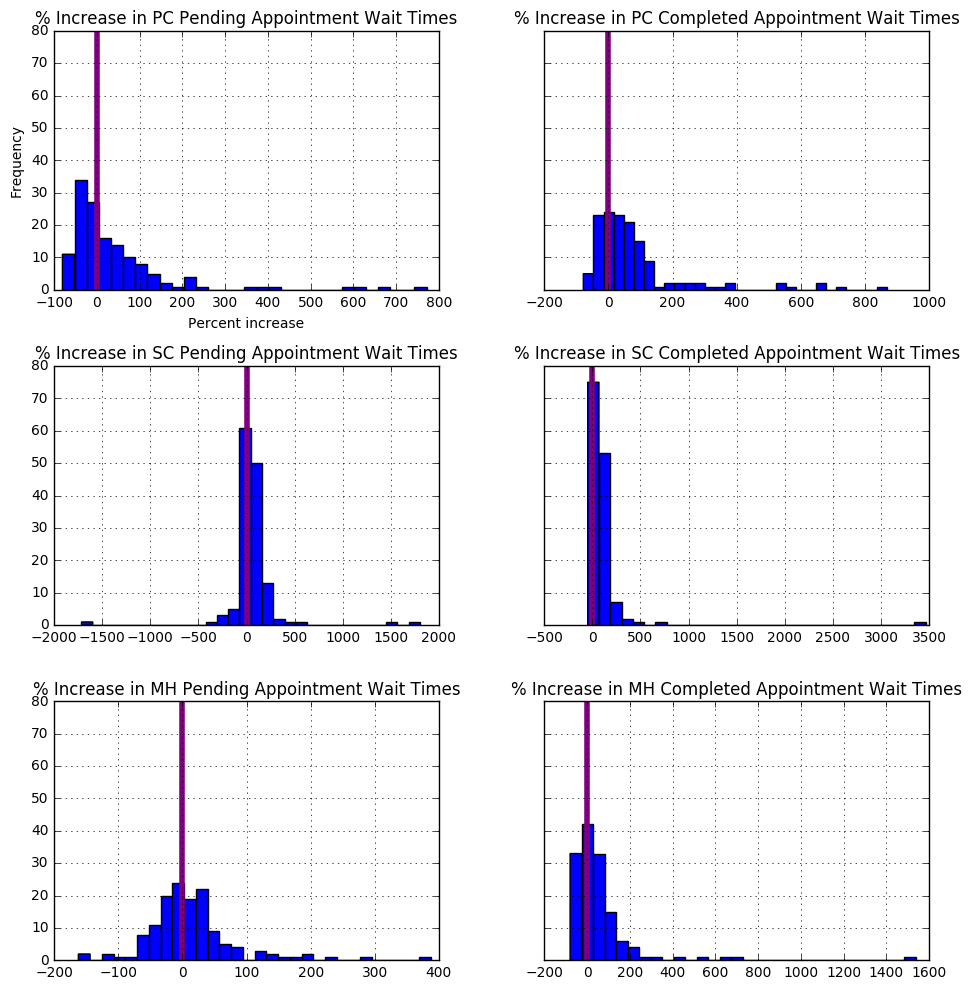

In [289]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True, figsize=(10,10))
color= "purple"
ax1.axvline(0,0, color=color, linewidth=4)
df["PC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax1)
ax1.set_title("% Increase in PC Pending Appointment Wait Times")
ax1.set_xlabel("Percent increase")
ax1.set_ylabel("Frequency")



ax2.axvline(0,0, color=color, linewidth=4)

df["PC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax2)
ax2.set_title("% Increase in PC Completed Appointment Wait Times")



ax3.axvline(0,0, color=color, linewidth=4)

df["SC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax3)
ax3.set_title("% Increase in SC Pending Appointment Wait Times")

ax4.axvline(0,0, color=color, linewidth=4)

df["SC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax4)
ax4.set_title("% Increase in SC Completed Appointment Wait Times")

ax5.axvline(0,0, color=color, linewidth=4)

df["MH_Wait_Pending_Increase_%"].hist(bins=30, ax=ax5)
ax5.set_title("% Increase in MH Pending Appointment Wait Times")

ax6.axvline(0,0, color=color, linewidth=4)

df["MH_Wait_Complete_Increase_%"].hist(bins=30, ax=ax6)
ax6.set_title("% Increase in MH Completed Appointment Wait Times")


plt.tight_layout()

print "While wait times did improve for some stations, most grew worse, regardless of the metric used."
print "(Purple line represents zero, aka no change.)"

Looking at the percentage point increase in wait times is no better for the VA.


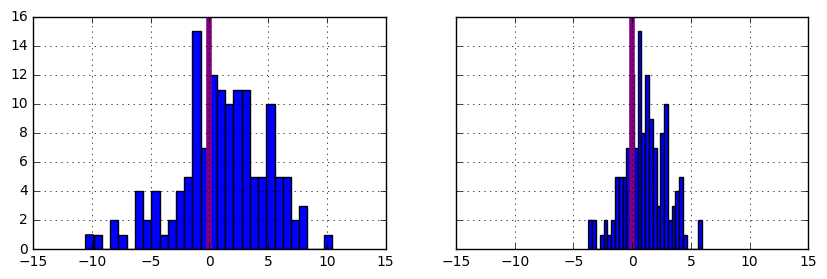

In [290]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,3))
color="purple"
ax1.axvline(0,0, color=color, linewidth=4)
df["Percentage_Point_Wait_Over_30_Increase_Pending"].hist(bins=30, ax=ax1)
ax2.axvline(0,0, color=color, linewidth=4)
df["Percentage_Point_Wait_Over_30_Increase_Complete"].hist(bins=30, ax=ax2)

print "Looking at the percentage point increase in wait times is no better for the VA."

# Were Choice Hires sent to the worst stations?

No, there is no correlation with choice hires and any of our metrics.


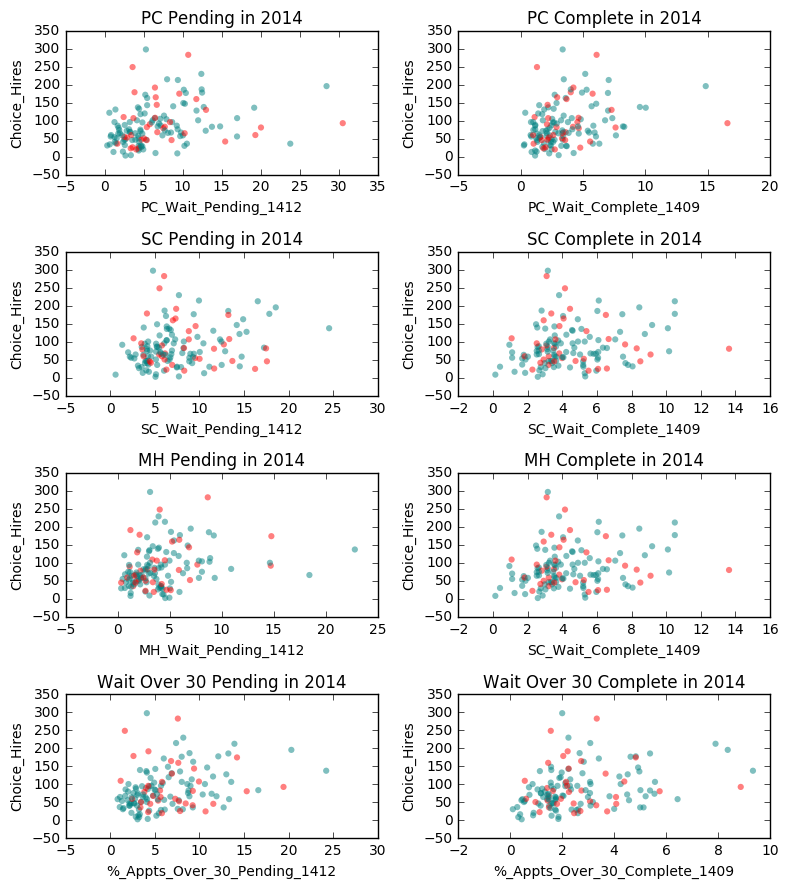

In [291]:
multiples_2014("Choice_Hires")
print "No, there is no correlation with choice hires and any of our metrics."

### What if we normalized for 2014 staffing levels?

The answer is still no.


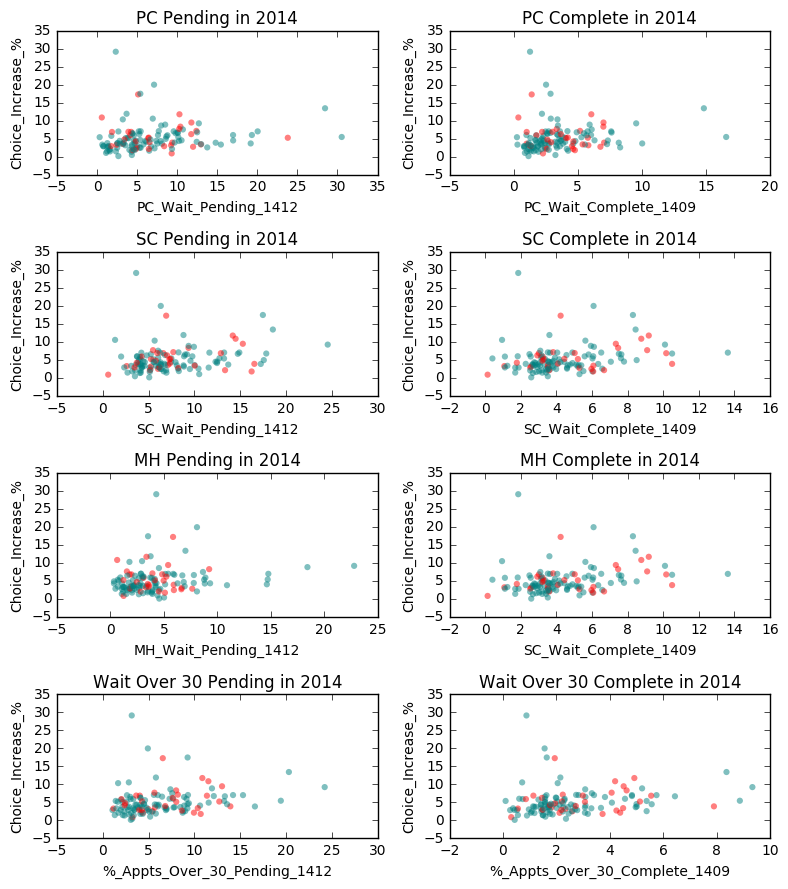

In [292]:
multiples_2014("Choice_Increase_%")
print "The answer is still no."

### What if we only looked at staffing level increase?


The answer is still no.


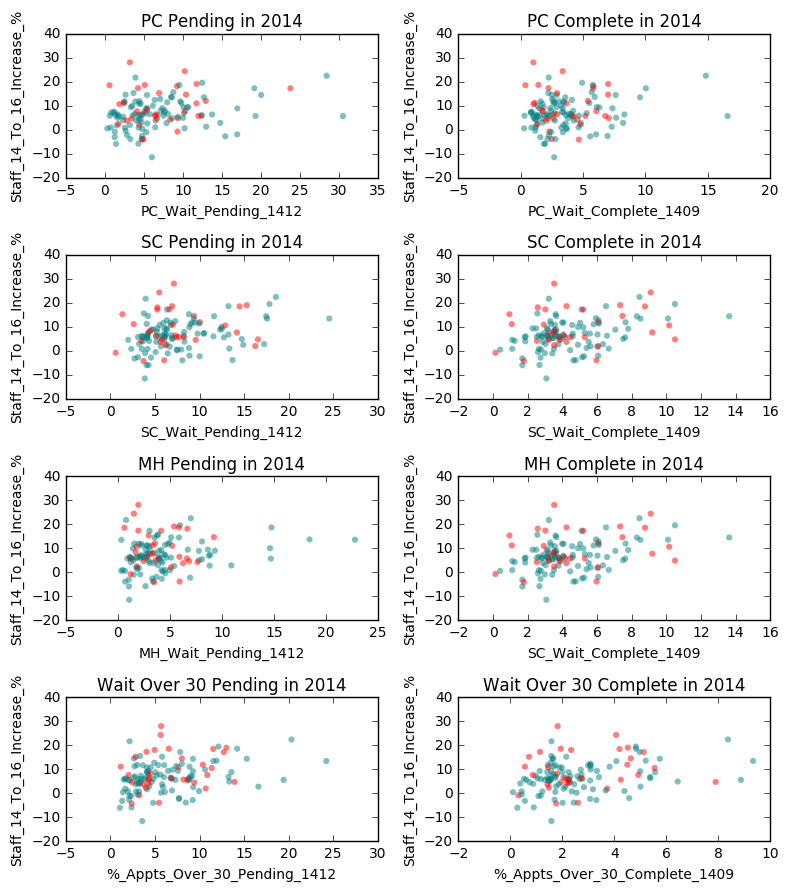

In [293]:
multiples_2014("Staff_14_To_16_Increase_%")
print "The answer is still no."

# Did Choice Hires help where they were sent?

No, there is no correlation with choice hires and any of our metrics.


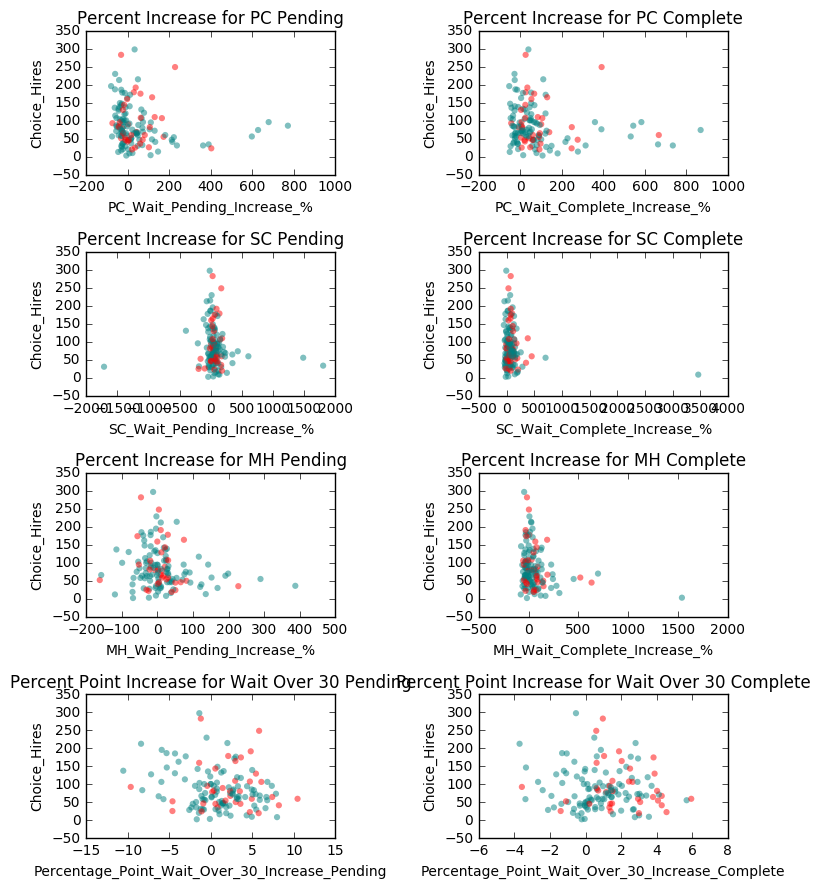

In [294]:
multiples('Choice_Hires', 'Choice Hires')
print "No, there is no correlation with choice hires and any of our metrics."

### What if we normalize for the 2014 staffing level?

The answer is still no.


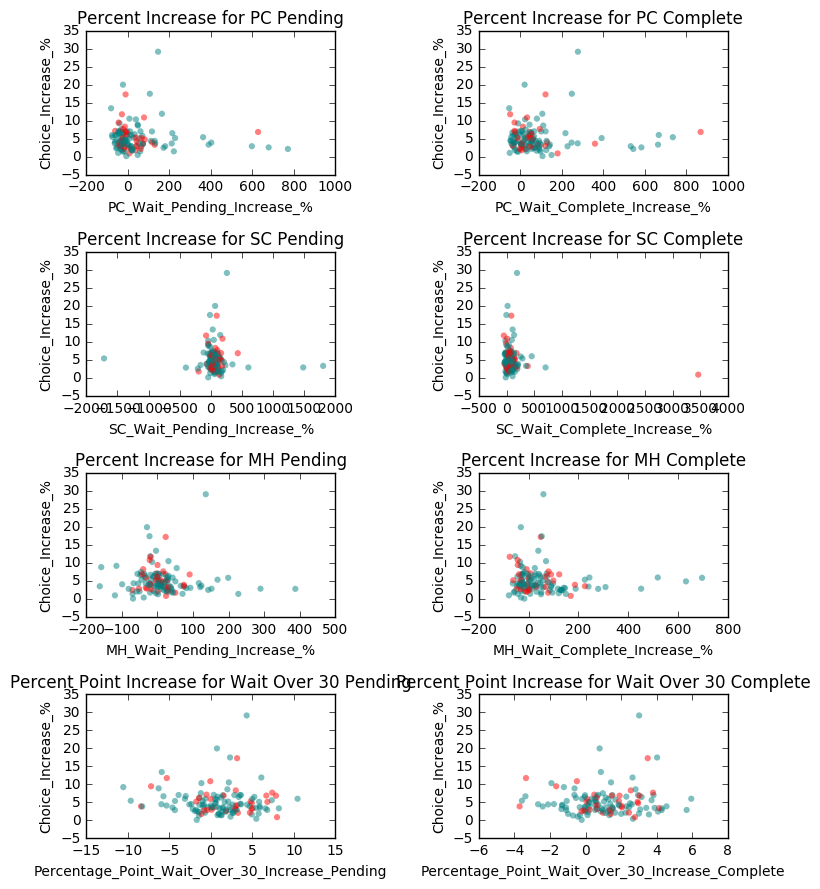

In [295]:
multiples('Choice_Increase_%', 'Choice Hires')
print "The answer is still no."

### What if we look at overall staffing level increases?

The answer is still no.


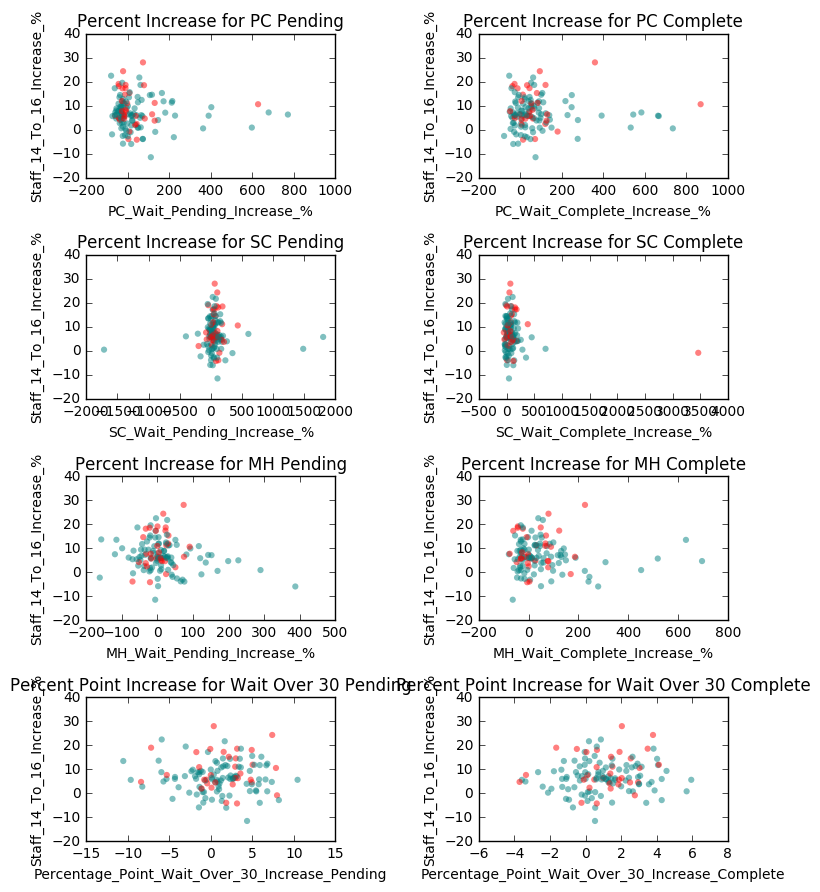

In [296]:
multiples("Staff_14_To_16_Increase_%", 'Choice Hires')
print "The answer is still no."


# Did the choice hires go to places with a growing veterans population?

### First let's look at the county level

The answer is no.


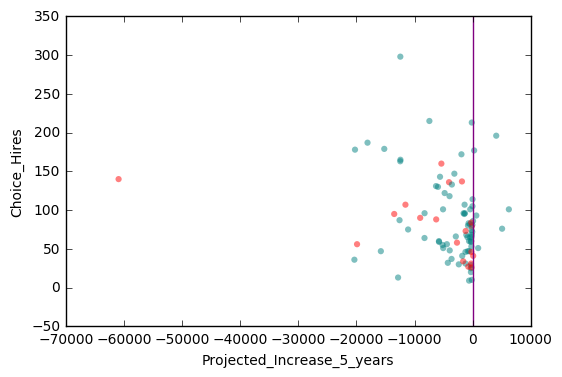

In [319]:
ax = df.plot(kind="scatter",x="Projected_Increase_5_years",y="Choice_Hires",c=df['Mark'].apply(lambda x: colors[x]),edgecolor='none',alpha=.5)
ax.axvline(0,0, color=color, linewidth=1)

print "The answer is no."

The answer is no.


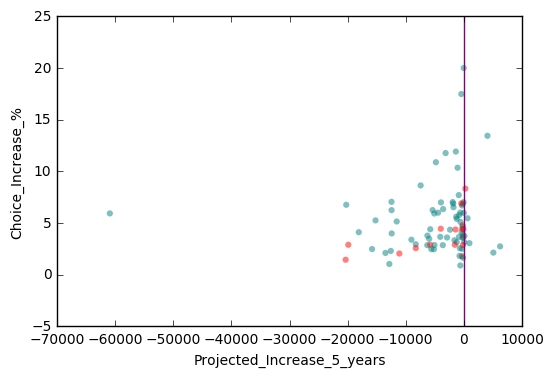

In [320]:
ax = df.plot(kind="scatter",x="Projected_Increase_5_years",y="Choice_Increase_%",c=df['Mark'].apply(lambda x: colors[x]),edgecolor='none',alpha=.5)
ax.axvline(0,0, color=color, linewidth=1)

print "The answer is no."

The answer is no.


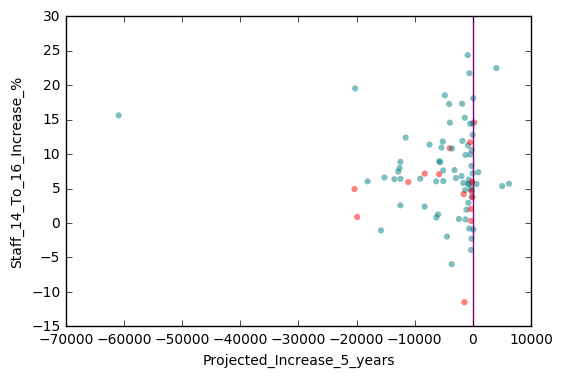

In [321]:
ax = df.plot(kind="scatter",x="Projected_Increase_5_years",y="Staff_14_To_16_Increase_%",c=df['Mark'].apply(lambda x: colors[x]),edgecolor='none',alpha=.5)
ax.axvline(0,0, color=color, linewidth=1)

print "The answer is no."

### Let's look at the state level

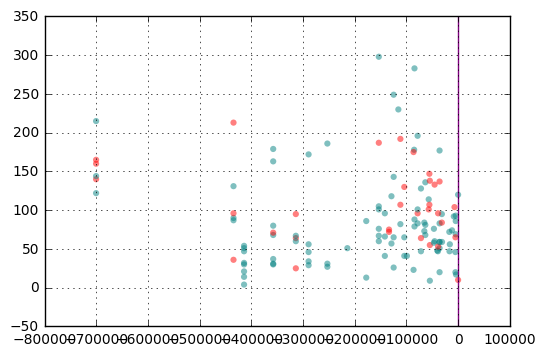

In [315]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df["Vet_Pop_State_Increase_20"], df["Choice_Hires"], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.grid()
ax.axvline(0,0, color=color, linewidth=1)
plt.show()


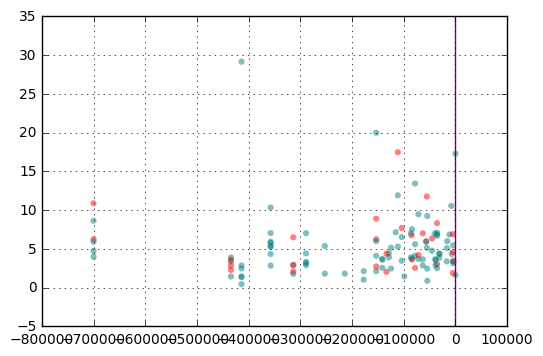

In [316]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df["Vet_Pop_State_Increase_20"], df["Choice_Increase_%"], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.grid()
ax.axvline(0,0, color=color, linewidth=1)
plt.show()

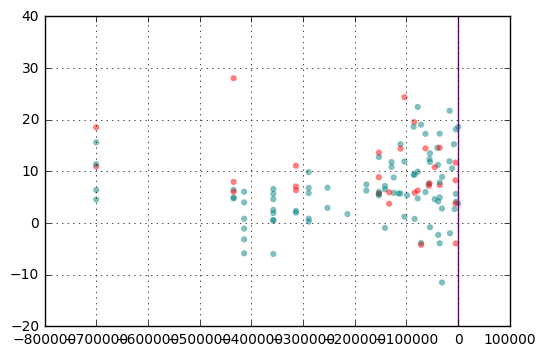

In [317]:
fig, ax = plt.subplots()
colors = { 'mark':'red','no':'teal'}

ax.scatter(df["Vet_Pop_State_Increase_20"], df["Staff_14_To_16_Increase_%"], c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none',alpha=.5)
ax.grid()
ax.axvline(0,0, color=color, linewidth=1)
plt.show()

# So what can we say?

The choice hire money did not lead to a surge in staffing, nor did it help VAs when we look at the wait times. (Looking at the sail data would help with this).

The priortized stations looked no different from all the others based on wait times and the VA's own projected increase in veteran populations.



# What is there left to do?

* Improve counties. 
* Check correlation with sail data
* potentially answer budget question
* double check wait times